# Conjunto de Datos:
Datos de histogramas a fetos en clinica de ginecobstetricia

In [3]:
#%pip install empiricaldist
#%pip install pandas numpy matplotlib
#%pip install seaborn scipy statsmodels

# Librerías

In [4]:
#Manejo de datos y operaciones básicas
import pandas as pd
import numpy as np

#Gráficos
import matplotlib.pyplot as plt
import seaborn as sb

#Análisis estadístico
import empiricaldist #No nativa, instalar: pip install empiricaldist
import scipy
import statsmodels.api as sm

#Advertencias
import warnings
warnings.filterwarnings('ignore')

# Carga de datos

In [5]:
df = pd.read_csv('datos_tema_3.csv')
df

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


# ¿Qué tipos de variables tenemos en el conjunto de datos?

In [6]:
df.dtypes

baseline value                                            float64
accelerations                                             float64
fetal_movement                                            float64
uterine_contractions                                      float64
light_decelerations                                       float64
severe_decelerations                                      float64
prolongued_decelerations                                  float64
abnormal_short_term_variability                           float64
mean_value_of_short_term_variability                      float64
percentage_of_time_with_abnormal_long_term_variability    float64
mean_value_of_long_term_variability                       float64
histogram_width                                           float64
histogram_min                                             float64
histogram_max                                             float64
histogram_number_of_peaks                                 float64
histogram_

Vemos que todas nuestras variables son de tipo numerico

In [7]:
#Cantidad de variables por tipo
df.dtypes.value_counts()

float64    22
Name: count, dtype: int64

Tenemos un total de 22 variables numericas

# Variables con datos nulos

In [8]:
df.isnull().any()

baseline value                                            False
accelerations                                             False
fetal_movement                                            False
uterine_contractions                                      False
light_decelerations                                       False
severe_decelerations                                      False
prolongued_decelerations                                  False
abnormal_short_term_variability                           False
mean_value_of_short_term_variability                      False
percentage_of_time_with_abnormal_long_term_variability    False
mean_value_of_long_term_variability                       False
histogram_width                                           False
histogram_min                                             False
histogram_max                                             False
histogram_number_of_peaks                                 False
histogram_number_of_zeroes              

No poseemos ninguna variable con valores nulos

# Comportamiento estadístico de los datos

In [17]:
df.describe(include = 'all')

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


No tenemos variables cualitativas, solo numericas entonces no describimos las variables tipo object

In [16]:
#Categóricas - Cualitativas
#df_proc.describe(include = 'object')

# Modos de visualización

Numéricas

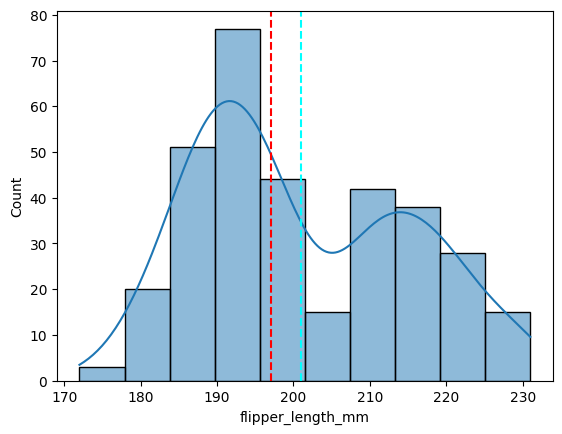

In [20]:
sb.histplot(data = df_proc, x = 'flipper_length_mm', kde = True)
plt.axvline(x = df_proc.flipper_length_mm.mean(), color = 'cyan', linestyle = 'dashed')
plt.axvline(x = df_proc.flipper_length_mm.median(), color = 'red', linestyle = 'dashed')
plt.show()

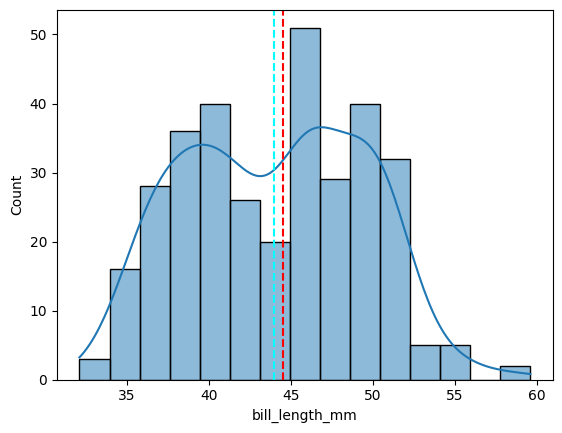

In [23]:
sb.histplot(data = df_proc, x = 'bill_length_mm', kde = True, bins = 15)
plt.axvline(x = df_proc.bill_length_mm.mean(), color = 'cyan', linestyle = 'dashed')
plt.axvline(x = df_proc.bill_length_mm.median(), color = 'red', linestyle = 'dashed')
plt.show()

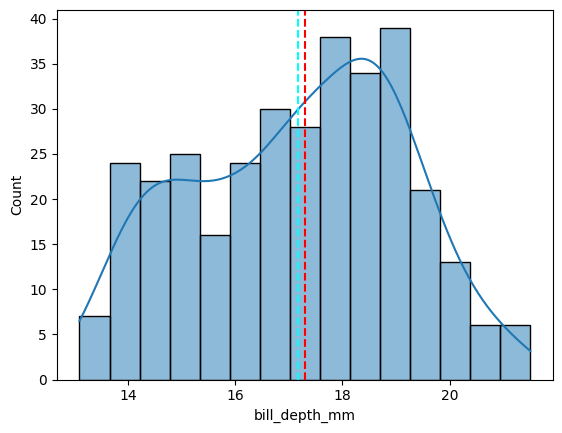

In [24]:
sb.histplot(data = df_proc, x = 'bill_depth_mm', kde = True, bins = 15)
plt.axvline(x = df_proc.bill_depth_mm.mean(), color = 'cyan', linestyle = 'dashed')
plt.axvline(x = df_proc.bill_depth_mm.median(), color = 'red', linestyle = 'dashed')
plt.show()

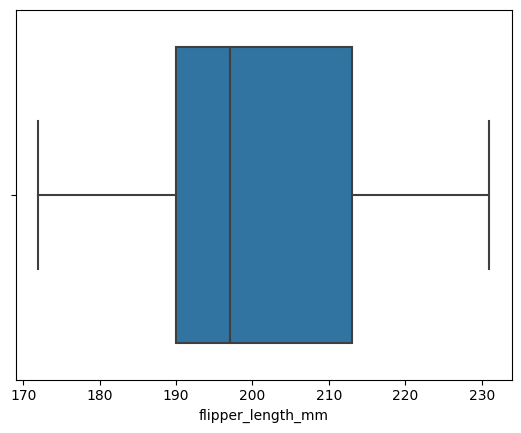

In [25]:
sb.boxplot(data = df_proc, x = 'flipper_length_mm')
plt.show()

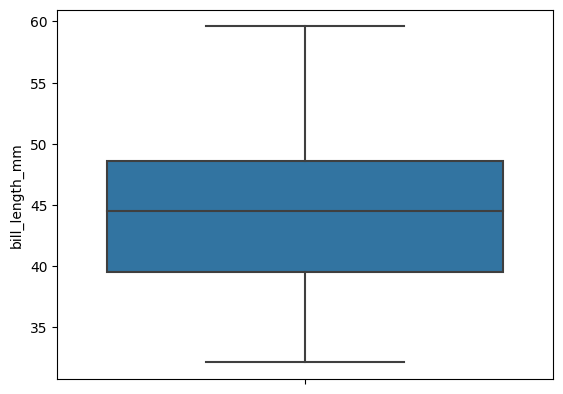

In [26]:
sb.boxplot(data = df_proc, y = 'bill_length_mm')
plt.show()

Análisis Bivariado

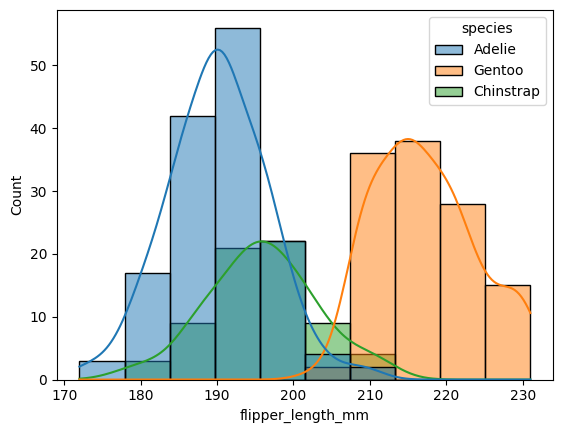

In [28]:
sb.histplot(data = df_proc, x = 'flipper_length_mm', kde = True, hue = 'species')
plt.show()

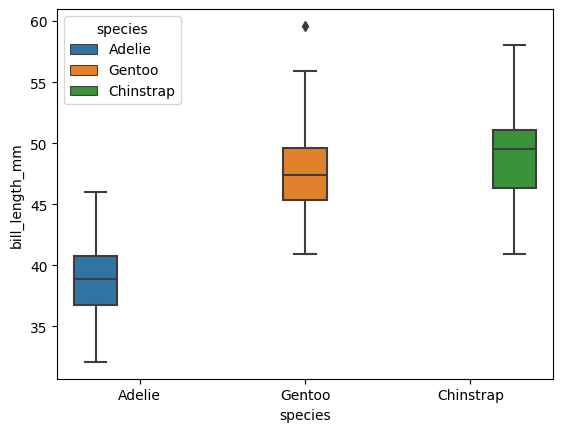

In [29]:
sb.boxplot(data = df_proc, y = 'bill_length_mm', x = 'species', hue = 'species')
plt.show()

Análisis Multivariado

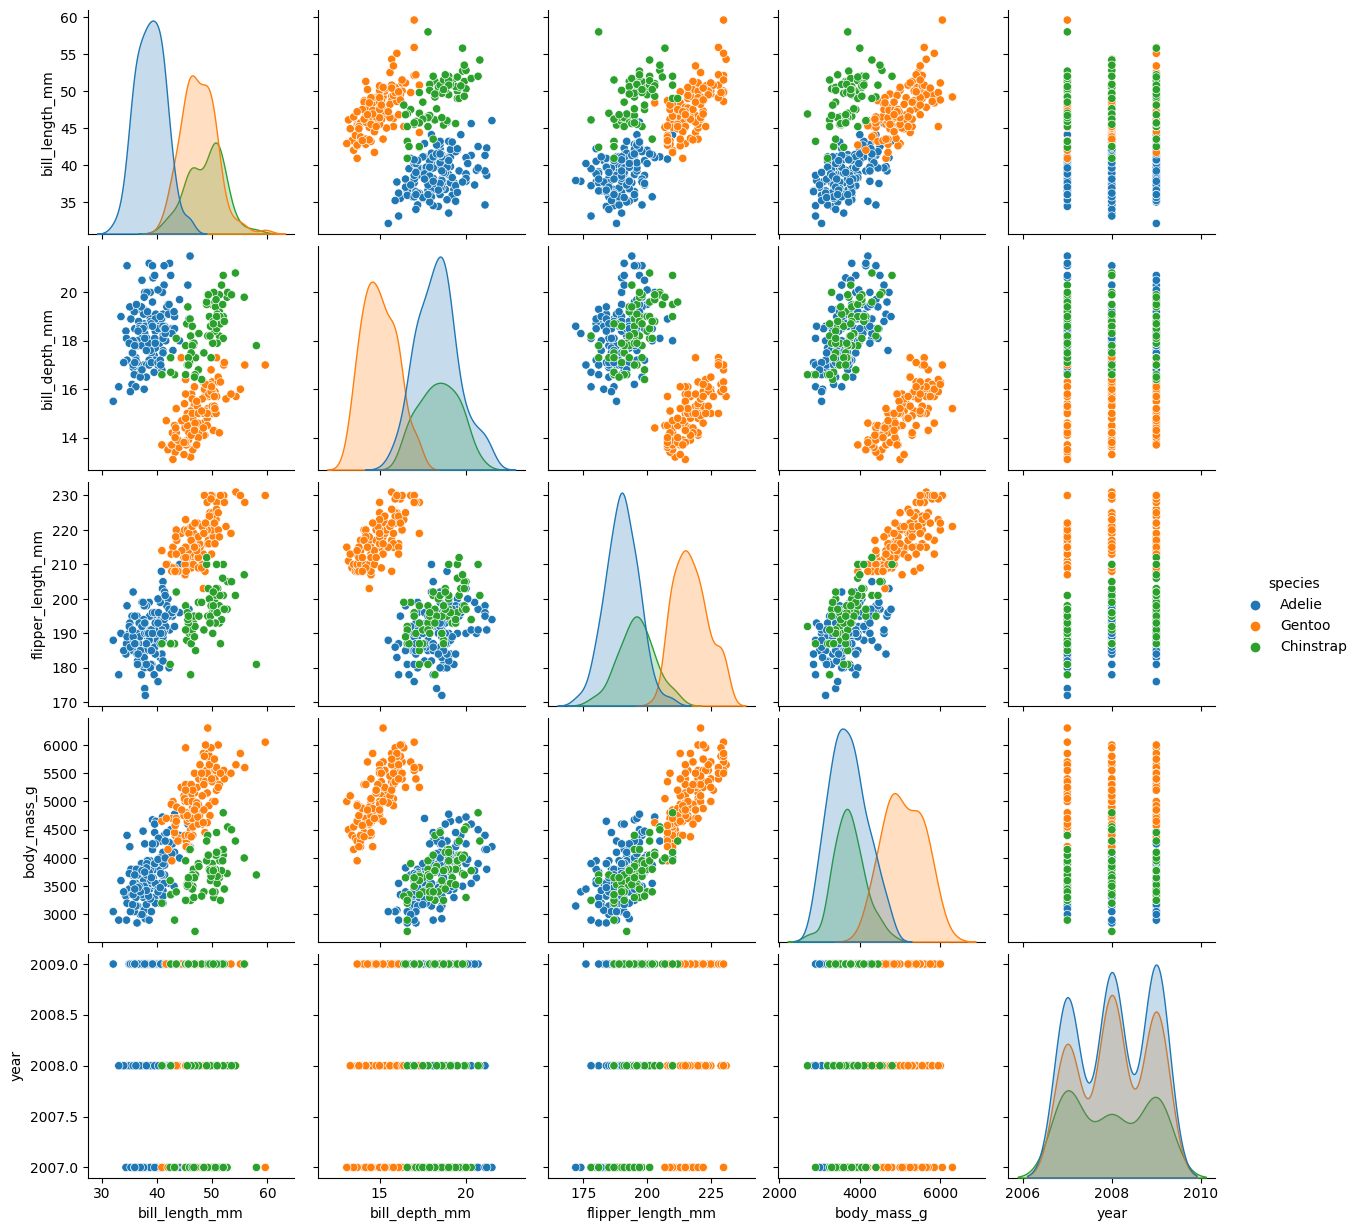

In [30]:
sb.pairplot(data = df_proc, hue = 'species')
plt.show()

In [32]:
df_proc.corr(numeric_only = True)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
bill_length_mm,1.000000,-0.228626,0.653096,0.589451,0.032657
bill_depth_mm,-0.228626,1.000000,-0.577792,-0.472016,-0.048182
flipper_length_mm,0.653096,-0.577792,1.000000,0.872979,0.151068
body_mass_g,0.589451,-0.472016,0.872979,1.000000,0.021862
year,0.032657,-0.048182,0.151068,0.021862,1.000000


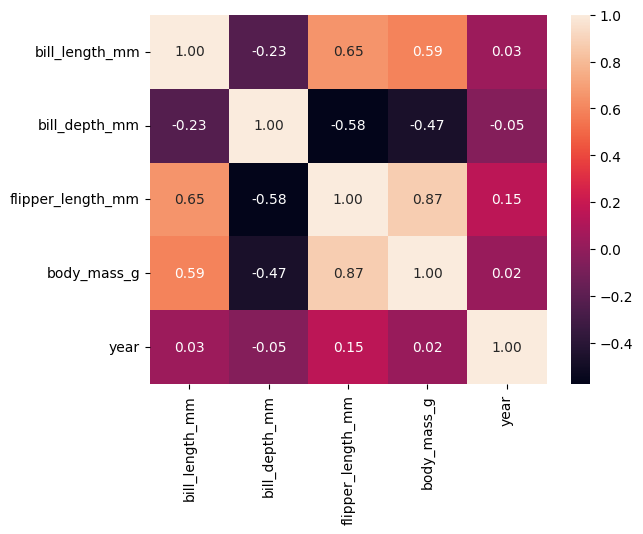

In [35]:
sb.heatmap(data = df_proc.corr(numeric_only = True), annot = True, fmt = '.2f')
plt.show()

# Exploración de datos nulos

In [ ]:
%pip install pyjanitor
%pip install missingno
%pip install pyreadr
%pip install session_info
%pip install UpSetPlot
%pip install nbformat

# Importar Librerías

In [2]:
import janitor
import matplotlib.pyplot as plt
import missingno
import numpy as np
import pandas as pd
import pyreadr
import seaborn as sb
import session_info
import upsetplot

c:\Users\juan.valencia72\AppData\Local\Programs\Python\Python311\Lib\site-packages\upsetplot\plotting.py:15: MatplotlibDeprecationWarning: The matplotlib.tight_layout module was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  from matplotlib.tight_layout import get_renderer


In [3]:
%run pandas-missing-extension.ipynb

# Visualización de datos nulos

In [4]:
datos_faltantes = pd.DataFrame.from_dict(data = dict(x = [0, 1, np.nan, np.nan, None], 
                                                     y = [0, 1, pd.NA, np.nan, None]))
datos_faltantes

,x,y
0,0.0,0
1,1.0,1
2,NaN,<NA>
3,NaN,NaN
4,NaN,None


In [5]:
datos_faltantes.isnull()

,x,y
0,False,False
1,False,False
2,True,True
3,True,True
4,True,True


# Cargue de datos

In [6]:
resultado = pyreadr.read_r('riskfactors.rda')
datos_riesgo = resultado['riskfactors']
datos_riesgo.head()

,state,sex,age,weight_lbs,height_inch,bmi,marital,pregnant,children,education,...,smoke_100,smoke_days,smoke_stop,smoke_last,diet_fruit,diet_salad,diet_potato,diet_carrot,diet_vegetable,diet_juice
0,26,Female,49,190,64,32.68,Married,NaN,0,6,...,No,NaN,NaN,NaN,1095,261,104,156,521,12
1,40,Female,48,170,68,25.90,Divorced,NaN,0,5,...,No,NaN,NaN,NaN,52,209,52,0,52,0
2,72,Female,55,163,64,28.04,Married,NaN,0,4,...,No,NaN,NaN,NaN,36,156,52,24,24,24
3,42,Male,42,230,74,29.59,Married,NaN,1,6,...,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,32,Female,66,135,62,24.74,Widowed,NaN,0,5,...,Yes,Everyday,Yes,NaN,-7,261,209,261,365,104


In [7]:
#Cantidad de registros, variables, tipos de datos y cantidad de nulos
datos_riesgo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 34 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   state             245 non-null    category
 1   sex               245 non-null    category
 2   age               245 non-null    int32   
 3   weight_lbs        235 non-null    object  
 4   height_inch       243 non-null    object  
 5   bmi               234 non-null    float64 
 6   marital           244 non-null    category
 7   pregnant          30 non-null     category
 8   children          245 non-null    int32   
 9   education         244 non-null    category
 10  employment        245 non-null    category
 11  income            245 non-null    category
 12  veteran           242 non-null    category
 13  hispanic          243 non-null    category
 14  health_general    245 non-null    category
 15  health_physical   245 non-null    int32   
 16  health_mental     245 non-

In [8]:
#Cantidad de datos completos
datos_riesgo.missing.number_complete()

7144

In [9]:
#Cantidad de datos incompletos
datos_riesgo.missing.number_missing()

1186

In [10]:
#Nivel de completitud de las variables
datos_riesgo.missing.missing_variable_summary()

,variable,n_missing,n_cases,pct_missing
0,state,0,245,0.000000
1,sex,0,245,0.000000
2,age,0,245,0.000000
3,weight_lbs,10,245,4.081633
4,height_inch,2,245,0.816327
5,bmi,11,245,4.489796
6,marital,1,245,0.408163
7,pregnant,215,245,87.755102
8,children,0,245,0.000000
9,education,1,245,0.408163


In [15]:
#Completitud de los individuos
datos_riesgo.missing.missing_case_summary()

,case,n_missing,pct_missing
0,0,6,16.666667
1,1,6,16.666667
2,2,7,19.444444
3,3,12,33.333333
4,4,5,13.888889
...,...,...,...
240,240,6,16.666667
241,241,5,13.888889
242,242,3,8.333333
243,243,2,5.555556


# Visualización de datos nulos

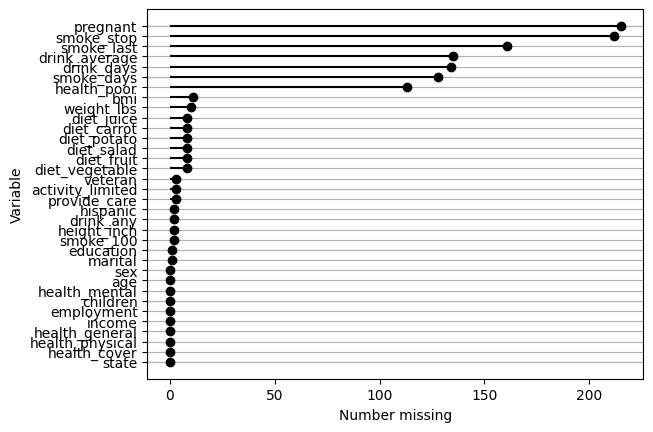

In [17]:
datos_riesgo.missing.missing_variable_plot()

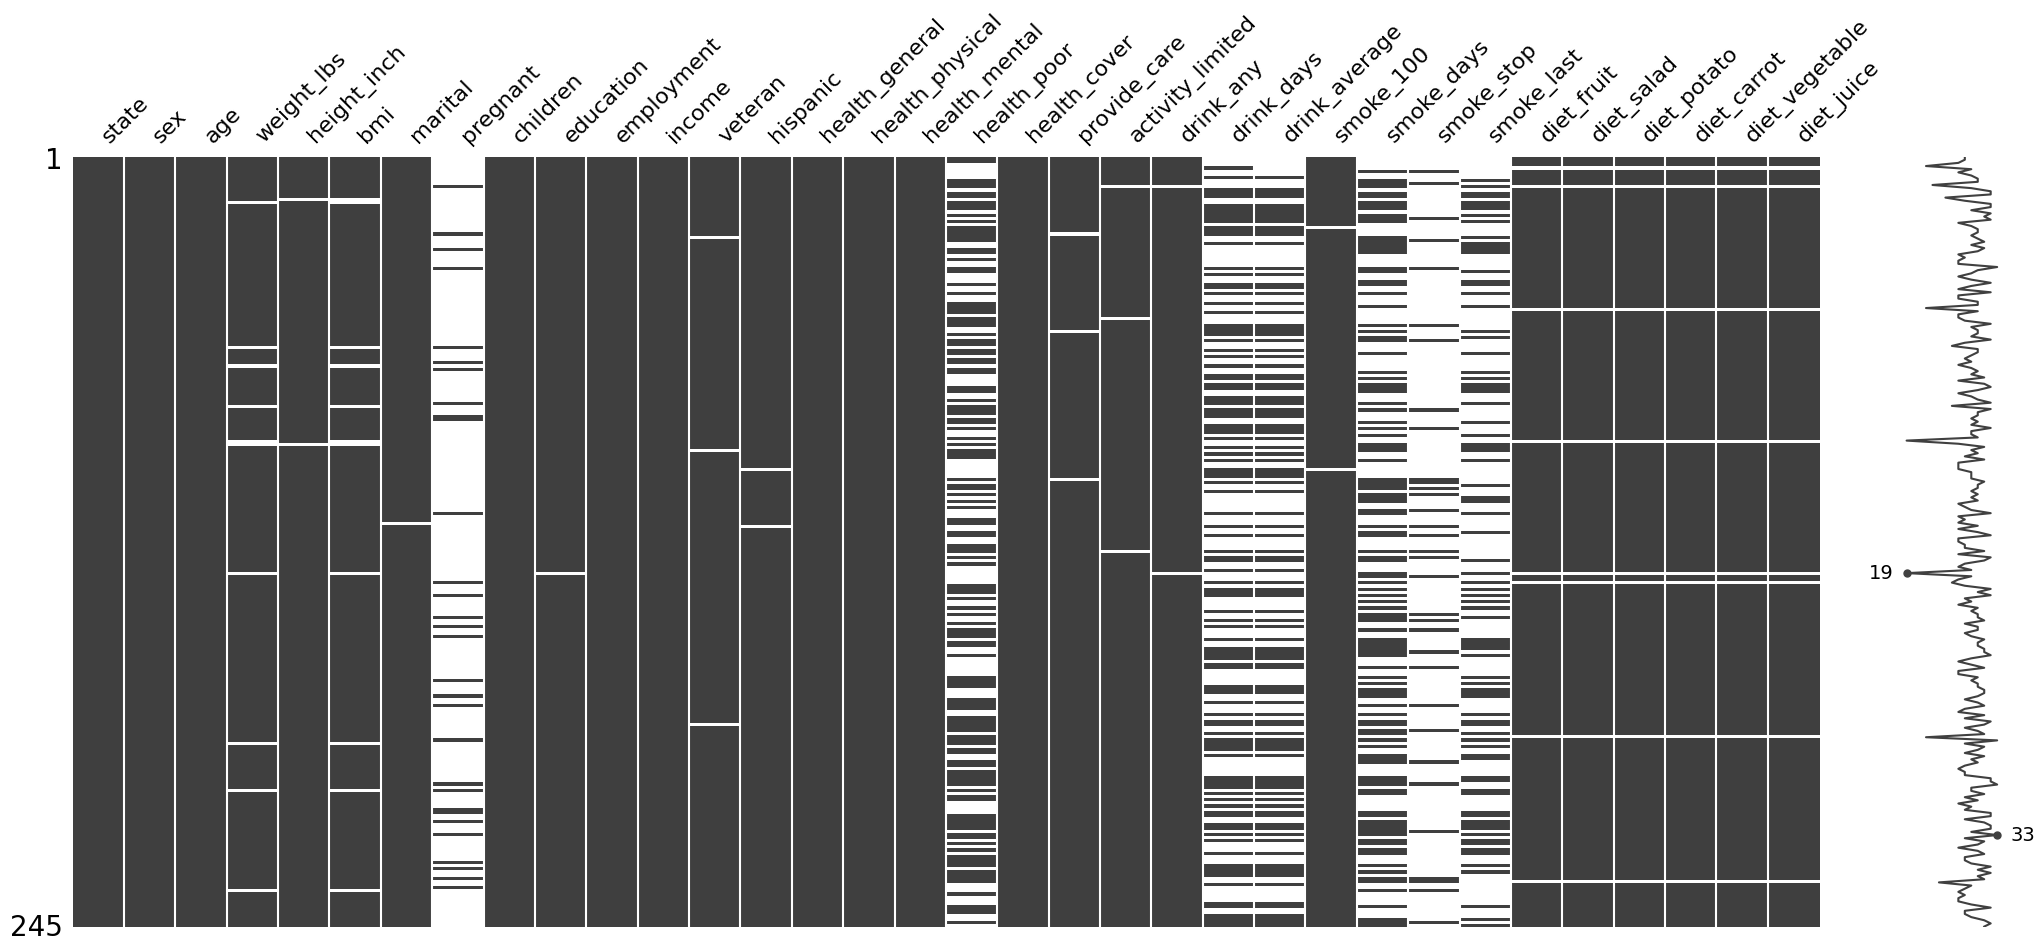

In [18]:
missingno.matrix(df = datos_riesgo)
plt.show()

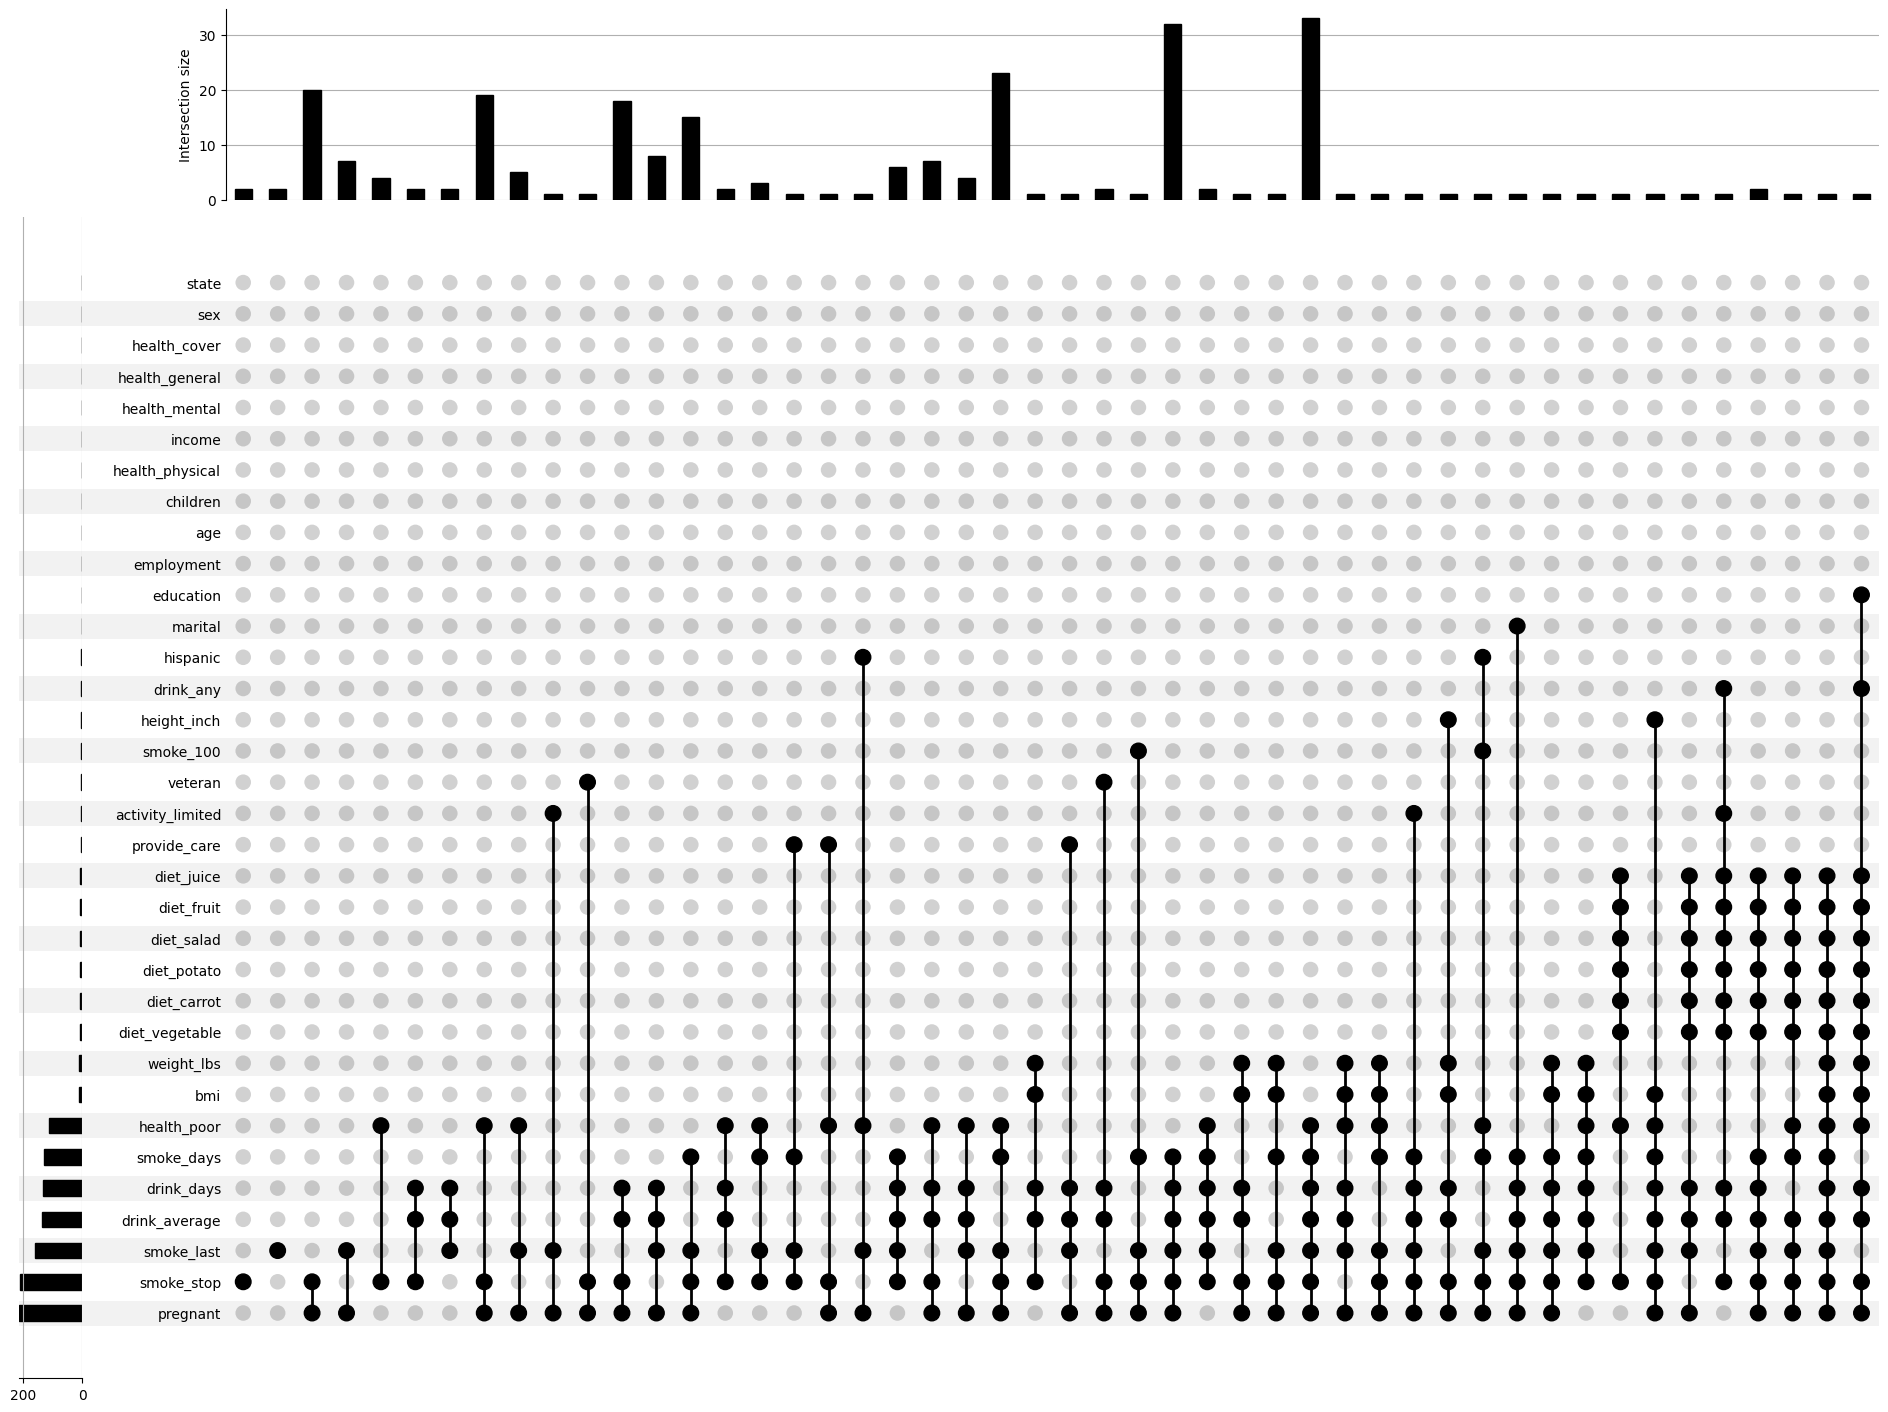

In [19]:
datos_riesgo.missing.missing_upsetplot()
plt.show()